Alunos:

bfss@cesar.school - Bruno

fom@cesar.school - Fabio

mgrb@cesar.school - Marlos

rmbp@cesar.school - Renata

# Import do dataset

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# importando datasets
!git clone https://github.com/brunof-santos/cesar-modelos-descritivos.git

Cloning into 'cesar-modelos-descritivos'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), 370.12 KiB | 2.70 MiB/s, done.


In [ ]:
# lendo dataframe
df = pd.read_csv('/content/cesar-modelos-descritivos/social_media_and_mental_health.csv')

# Introdução

O dataset contém informações que visa investigar a possível correlação entre a quantidade de tempo que um indivíduo passa nas redes sociais e o impacto que isso tem em sua saúde mental.

O dataset apresenta as resposta à pesquisa de coleta de dados e foram organizados e, utilizando as técnicas aprendidas nas aulas, demonstrar a relação entre as necessidades um grupod e pessoas (agrupados por idade) com base em suas respostas às perguntas da pesquisa.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 21 columns):
 #   Column                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                --------------  -----  
 0   Timestamp                                                                                                             481 non-null    object 
 1   1. What is your age?                                                                                                  481 non-null    float64
 2   2. Gender                                                                                                             481 non-null    object 
 3   3. Relationship Status                                                                                                481 non-null    object 
 4   4. Occup

# Destrinchando o DataSet

O nosso dataset é baseado em perguntas contém as seguintes informações:

1) Idade

2) Gênero

3) Status de Relacionamento

4) Ocupação

5) Organização a qual é associado

6) Quais as midias sociais que utiliza

7) Tempo médio de uso

dentre outros

In [ ]:
df.head(10)

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,...,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1
5,4/18/2022 19:33:48,22.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,4,...,2,3,4,3,4,4,3,3,2,4
6,4/18/2022 19:36:12,21.0,Female,Married,University Student,University,Yes,"Facebook, Instagram, YouTube, Snapchat, TikTok",Between 3 and 4 hours,4,...,2,2,4,3,5,3,4,5,5,3
7,4/18/2022 19:36:17,21.0,Female,In a relationship,University Student,University,Yes,"Facebook, Instagram, YouTube",More than 5 hours,5,...,3,3,3,1,1,3,1,5,5,1
8,4/18/2022 19:39:36,21.0,Female,In a relationship,University Student,University,Yes,"Facebook, Instagram, YouTube",More than 5 hours,5,...,3,3,1,1,1,3,1,5,5,1
9,4/18/2022 19:41:34,20.0,Male,Single,University Student,University,No,"Reddit, Pinterest",Less than an Hour,1,...,1,1,1,1,1,1,1,1,1,1


# Tratamento de dados

Os campos foram renomeados para melhor resultado na pesquisa e apresentação dos dados.

Levando em consideração a definição da relação entre o "tipo de pergunta" e a "doença mental", neste dataset foi definida a correlação das perguntas às doenças de saúde mental a qual elas se referem.

Desta forma, na coluna de cada pergunta, o nome do campo indica a qual doença ela está associada, para que seja possível atingir o objetivo de estudo dessa relação neste ambiente.

In [ ]:
# Renoemando as colunas
df.rename(columns={'1. What is your age?': 'age','2. Gender':'gender', '3. Relationship Status': 'relationship_status',
                   '4. Occupation Status': 'ocupation',
                   '5. What type of organizations are you affiliated with?': 'organization',
                   '6. Do you use social media?':'social_media',
                   '7. What social media platforms do you commonly use?': 'platforms_used',
                   '8. What is the average time you spend on social media every day?':'average_time_spending',
                   '9. How often do you find yourself using Social media without a specific purpose?':'ADHD Q1',
                   '10. How often do you get distracted by Social media when you are busy doing something?':'ADHD Q2',
                   "11. Do you feel restless if you haven't used Social media in a while?":'Anxiety Q1',
                   '12. On a scale of 1 to 5, how easily distracted are you?':'ADHD Q3',
                   '13. On a scale of 1 to 5, how much are you bothered by worries?':'Anxiety Q2',
                   '14. Do you find it difficult to concentrate on things?':'ADHD Q4',
                   '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?':'Self Esteem Q1',
                   '16. Following the previous question, how do you feel about these comparisons, generally speaking?':'Self Esteem Q2',
                   '17. How often do you look to seek validation from features of social media?':'Self Esteem Q3',
                   '18. How often do you feel depressed or down?':'Depression Q1',
                   '19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?':'Depression Q2',
                   '20. On a scale of 1 to 5, how often do you face issues regarding sleep?':'Depression Q3' },inplace=True)

Conforme as informações do dataset provenientes do Kaggle, as perguntas realizadas possuem um tópico de origem: ADHD (TDAH), Anxiety (Ansiedade), Self Esteem (Auto estima) e Depression (Depressão).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              481 non-null    object 
 1   age                    481 non-null    float64
 2   gender                 481 non-null    object 
 3   relationship_status    481 non-null    object 
 4   ocupation              481 non-null    object 
 5   organization           451 non-null    object 
 6   social_media           481 non-null    object 
 7   platforms_used         481 non-null    object 
 8   average_time_spending  481 non-null    object 
 9   ADHD Q1                481 non-null    int64  
 10  ADHD Q2                481 non-null    int64  
 11  Anxiety Q1             481 non-null    int64  
 12  ADHD Q3                481 non-null    int64  
 13  Anxiety Q2             481 non-null    int64  
 14  ADHD Q4                481 non-null    int64  
 15  Self E

## Gênero





O campo gênero foi transformado em numérico, de forma a viabilizar o estudo das informações associadas ao gênero, seguindo o seguinte mapeamento:

Male - 0

Female - 1

Nonbinary, Non-binary, NB, unsure, Trans, Non binary - 2 (outros)

In [ ]:
# Vendo os gêneros que foram respondidos
print(df['gender'].unique())

['Male' 'Female' 'Nonbinary ' 'Non-binary' 'NB' 'unsure ' 'Trans'
 'Non binary ' 'There are others???']


In [ ]:
# Deletando a linha em que escreveu 'There are others???' pois a pessoa não respondeu o questionário de forma correta
df = df[df['gender'] != 'There are others???']

In [ ]:
# Fazendo mapeamento dos gêneros
# Todas as respostas de Não binárias foram englobadas no mesmo conjunto, juntamente da pessoa que respondeu 'Trans'
gender_map = {'Male':0, 'Female':1,'Nonbinary ':2, 'Non-binary':2,'NB':2,'unsure ':2, 'Trans':2, 'Non binary ':2}
df['gender_map'] = df['gender'].replace(gender_map)

## Status de relacionamento

O campo status de relacionamento foi transformado em numérico, seguindo o seguinte mapeamento:

Single - 0

Married - 1

Divorced - 2

In a relationship - 3

In [ ]:
# Verificando tipos de status de relacionamento
print(df['relationship_status'].unique())

['In a relationship' 'Single' 'Married' 'Divorced']


In [ ]:
# Fazendo mapeamento dos status de relacionamento
relationship_map = {'Single':0, 'Married':1,'Divorced':2, 'In a relationship':3}
df['relationshi_map'] = df['relationship_status'].replace(relationship_map)

## Tempo médio gasto



Já na coluna Tempo médio gasto nas mídias sociais foi tranformada em numérico, com o seguinte mapeamento dos dados:

Less than an Hour - 0

Between 1 and 2 hours - 1

Between 2 and 3 hours - 2

Between 3 and 4 hours - 3

Between 4 and 5 hours - 4

More than 5 hours - 5

In [ ]:
# Verificando tipos de tempo médio gasto
print(df['average_time_spending'].unique())

['Between 2 and 3 hours' 'More than 5 hours' 'Between 3 and 4 hours'
 'Less than an Hour' 'Between 1 and 2 hours' 'Between 4 and 5 hours']


In [ ]:
# Fazendo mapeamento dos tempos médio gasto
average_time_spending_map = {'Less than an Hour':0, 'Between 1 and 2 hours':1,'Between 2 and 3 hours':2, 'Between 3 and 4 hours':3, 'Between 4 and 5 hours':4, 'More than 5 hours':5}
df['average_time_spending_map'] = df['average_time_spending'].replace(average_time_spending_map)

## Redes sociais



O campo de redes sociais foi transformado em colunas para cada mídia social constante no dataser. Desta forma, para cada indivíduo o valor 0 ou 1 indica se ele utiliza a respetciva mídia social ou não.

In [ ]:
# Criando uma coluna para cada rede social com valor booleano
social_media = {'Facebook', 'Twitter', 'Instagram', 'YouTube', 'Discord',
                'Reddit', 'Pinterest', 'TikTok', 'Snapchat' }

for rede in social_media:
  df[rede] = df['platforms_used'].apply(lambda x: rede in x.split(', '))

for rede in social_media:
  df[rede] = df[rede].astype(int)

## Idade

O tipo de dado da idade foi alterado de float64 para int64 pois um usuário respondeu a idade com um número decimal. A idade foi arredondada.

In [ ]:
# Convertendo idade de float64 para int64
df['age'] = df['age'].astype('int64')

In [ ]:
df.head(10)

,Timestamp,age,gender,relationship_status,ocupation,organization,social_media,platforms_used,average_time_spending,ADHD Q1,...,average_time_spending_map,Instagram,Pinterest,Reddit,Facebook,Twitter,YouTube,TikTok,Discord,Snapchat
0,4/18/2022 19:18:47,21,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,1,0,1,1,1,1,0,1,0
1,4/18/2022 19:19:28,21,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,5,1,0,1,1,1,1,0,1,0
2,4/18/2022 19:25:59,21,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,3,1,1,0,1,0,1,0,0,0
3,4/18/2022 19:29:43,21,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,5,1,0,0,1,0,0,0,0,0
4,4/18/2022 19:33:31,21,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,2,1,0,0,1,0,1,0,0,0
5,4/18/2022 19:33:48,22,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,4,...,2,1,1,0,1,1,1,1,1,0
6,4/18/2022 19:36:12,21,Female,Married,University Student,University,Yes,"Facebook, Instagram, YouTube, Snapchat, TikTok",Between 3 and 4 hours,4,...,3,1,0,0,1,0,1,1,0,1
7,4/18/2022 19:36:17,21,Female,In a relationship,University Student,University,Yes,"Facebook, Instagram, YouTube",More than 5 hours,5,...,5,1,0,0,1,0,1,0,0,0
8,4/18/2022 19:39:36,21,Female,In a relationship,University Student,University,Yes,"Facebook, Instagram, YouTube",More than 5 hours,5,...,5,1,0,0,1,0,1,0,0,0
9,4/18/2022 19:41:34,20,Male,Single,University Student,University,No,"Reddit, Pinterest",Less than an Hour,1,...,0,0,1,1,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 0 to 480
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  480 non-null    object
 1   age                        480 non-null    int64 
 2   gender                     480 non-null    object
 3   relationship_status        480 non-null    object
 4   ocupation                  480 non-null    object
 5   organization               450 non-null    object
 6   social_media               480 non-null    object
 7   platforms_used             480 non-null    object
 8   average_time_spending      480 non-null    object
 9   ADHD Q1                    480 non-null    int64 
 10  ADHD Q2                    480 non-null    int64 
 11  Anxiety Q1                 480 non-null    int64 
 12  ADHD Q3                    480 non-null    int64 
 13  Anxiety Q2                 480 non-null    int64 
 14  ADHD Q4        

## Scores

Somando os scores de ADHD, Anxiety, Self Esteem e Depression

In [ ]:
# Somando os scores de ADHD, Anxiety, Self Esteem e Depression individualmente e criando uma nova coluna

ADHD = ['ADHD Q1', 'ADHD Q2', 'ADHD Q3', 'ADHD Q4']
df['ADHD Score'] = df[ADHD].sum(axis=1)

Anxiety = ['Anxiety Q1', 'Anxiety Q2']
df['Anxiety Score'] = df[Anxiety].sum(axis=1)

SelfEsteem = ['Self Esteem Q1', 'Self Esteem Q2','Self Esteem Q3']
df['Self Esteem Score'] = df[SelfEsteem].sum(axis=1)

Depression = ['Depression Q1', 'Depression Q2','Depression Q3']
df['Depression Score'] = df[Depression].sum(axis=1)

Total = ['ADHD Score', 'Anxiety Score','Self Esteem Score','Depression Score']
df['Total_Score'] = df[Total].sum(axis=1)

In [ ]:
df.head(10)

,Timestamp,age,gender,relationship_status,ocupation,organization,social_media,platforms_used,average_time_spending,ADHD Q1,...,Twitter,YouTube,TikTok,Discord,Snapchat,ADHD Score,Anxiety Score,Self Esteem Score,Depression Score,Total_Score
0,4/18/2022 19:18:47,21,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,1,1,0,1,0,18,4,7,14,43
1,4/18/2022 19:19:28,21,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,1,1,0,1,0,15,7,7,14,43
2,4/18/2022 19:25:59,21,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,0,1,0,0,0,11,6,7,11,35
3,4/18/2022 19:29:43,21,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,0,0,0,0,0,12,6,8,9,35
4,4/18/2022 19:33:31,21,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,0,1,0,0,0,17,9,9,9,44
5,4/18/2022 19:33:48,22,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,4,...,1,1,1,1,0,14,6,11,9,40
6,4/18/2022 19:36:12,21,Female,Married,University Student,University,Yes,"Facebook, Instagram, YouTube, Snapchat, TikTok",Between 3 and 4 hours,4,...,0,1,1,0,1,12,6,12,13,43
7,4/18/2022 19:36:17,21,Female,In a relationship,University Student,University,Yes,"Facebook, Instagram, YouTube",More than 5 hours,5,...,0,1,0,0,0,11,6,5,11,33
8,4/18/2022 19:39:36,21,Female,In a relationship,University Student,University,Yes,"Facebook, Instagram, YouTube",More than 5 hours,5,...,0,1,0,0,0,11,4,5,11,31
9,4/18/2022 19:41:34,20,Male,Single,University Student,University,No,"Reddit, Pinterest",Less than an Hour,1,...,0,0,0,0,0,4,2,3,3,12


# Clusterização

Para melhor análise dos dados, foi selecionada uma amostra dos grupos de pessoas jovens/adultos com idade até 25 anos.


In [ ]:
count = (df['age']  < 25).sum()
print(count)

327


In [ ]:
# pegando uma amostra do dataframe, das idades menores que 25 anos
df = df[df['age'] < 25]

In [ ]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
print(scaler.fit(df[['age', 'Total_Score']].values))
print(scaler.mean_)
print(scaler.transform(df[['age', 'Total_Score']].values))

df[['age_std', 'Total_Score_std']] = scaler.transform(df[['age', 'Total_Score']].values)
features = ['age_std', 'Total_Score_std']


StandardScaler()
[21.06422018 38.95412844]
[[-0.03199228  0.48061939]
 [-0.03199228  0.48061939]
 [-0.03199228 -0.46972099]
 [-0.03199228 -0.46972099]
 [-0.03199228  0.59941193]
 [ 0.46617319  0.12424175]
 [-0.03199228  0.48061939]
 [-0.03199228 -0.70730608]
 [-0.03199228 -0.94489118]
 [-0.53015774 -3.20194956]
 [ 1.46250412  0.95578957]
 [-0.03199228 -0.11334335]
 [ 0.46617319 -0.46972099]
 [-0.03199228 -0.46972099]
 [ 0.46617319  2.50009268]
 [ 0.96433865 -0.35092844]
 [-0.03199228 -1.53885391]
 [ 0.46617319 -1.30126882]
 [ 0.96433865 -0.82609863]
 [ 0.96433865 -0.46972099]
 [ 0.96433865  0.95578957]
 [-0.53015774  0.12424175]
 [ 0.46617319  0.24303429]
 [-0.03199228  1.07458212]
 [ 0.46617319  0.71820448]
 [ 1.46250412 -0.46972099]
 [-1.52648867 -0.23213589]
 [-1.02832321  1.19337467]
 [-0.03199228 -0.23213589]
 [-0.03199228  0.0054492 ]
 [ 0.96433865 -1.06368372]
 [ 0.46617319  0.48061939]
 [ 0.46617319 -0.46972099]
 [-0.03199228 -2.48919428]
 [-0.03199228 -0.35092844]
 [-1.0283232

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Escolhendo o número de clusters usando o método do cotovelo (elbow method)
inertia = []
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[features])
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

# Aplicando o método de Elbow


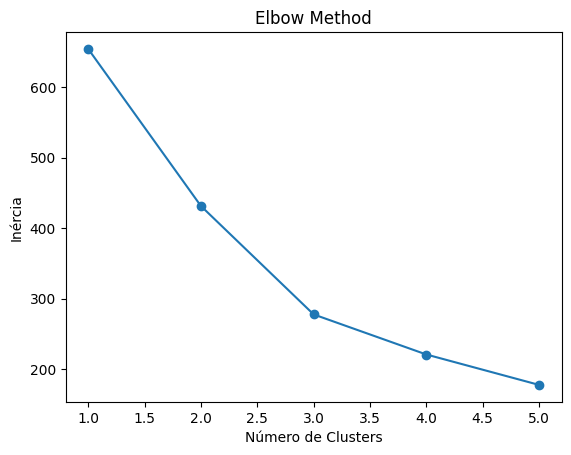

In [ ]:
plt.plot(range(1, 6), inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.title('Elbow Method')
plt.show()

A partir da análise do método, vimos que 3 clusters seria a quantidade de clusters ideal.


# Testando o K-means para 3 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


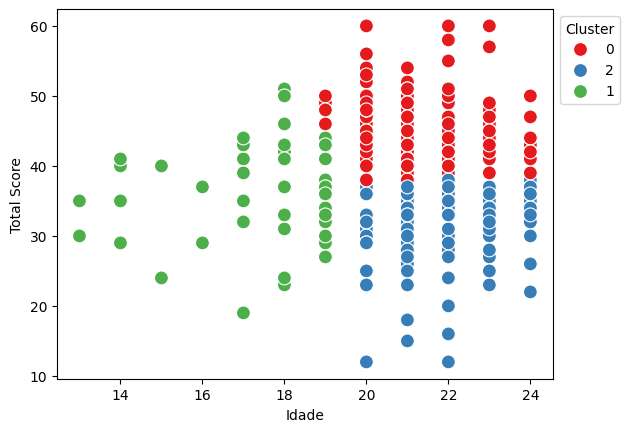

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sklearn.cluster import KMeans
import math

# Aplicando K-Means
kmeans = KMeans(n_clusters=3, random_state=0)
df['Cluster'] = kmeans.fit_predict(df[features])
df['Cluster'] = df['Cluster'].astype(str)

# Scatter plot dos dados com cores
ax = sns.scatterplot(data=df, s=100, x='age', y='Total_Score', hue='Cluster', palette='Set1')

# Adicionar título aos eixos
ax.set_xlabel('Idade')       # Título do eixo X
ax.set_ylabel('Total Score') # Título do eixo Y

# Ajustar a posição da legenda
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# Exibir o gráfico
plt.show()


Ao analisar o gráfico com 3 clusters, levatamos as seguintes características:

1) Um grupo de pessoas com idade acima de 20 anos com baixo score, determinando que uma parte delas não estão em estado crítico de doença mental, conforme a pesquisa (azul);

2) Um grupo de pessoas com idade acima de 20 anos com alto score, determinando que uma parte delas estão em estado crítico de doença mental, conforme a pesquisa (vermelho);

3) E nas idades abaixo de 20 anos, estão localizadas pessoas com média Score e mais distribuídas, apresentando tanto baixo score (não suscetíveis à doenças mentais), bem como até um Score razoával (50 pontos) que determina que há pessoas mais novas já apresentando quadro de saúde comprometido (verde).


# Apresntando o K-means de 2 a 6 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

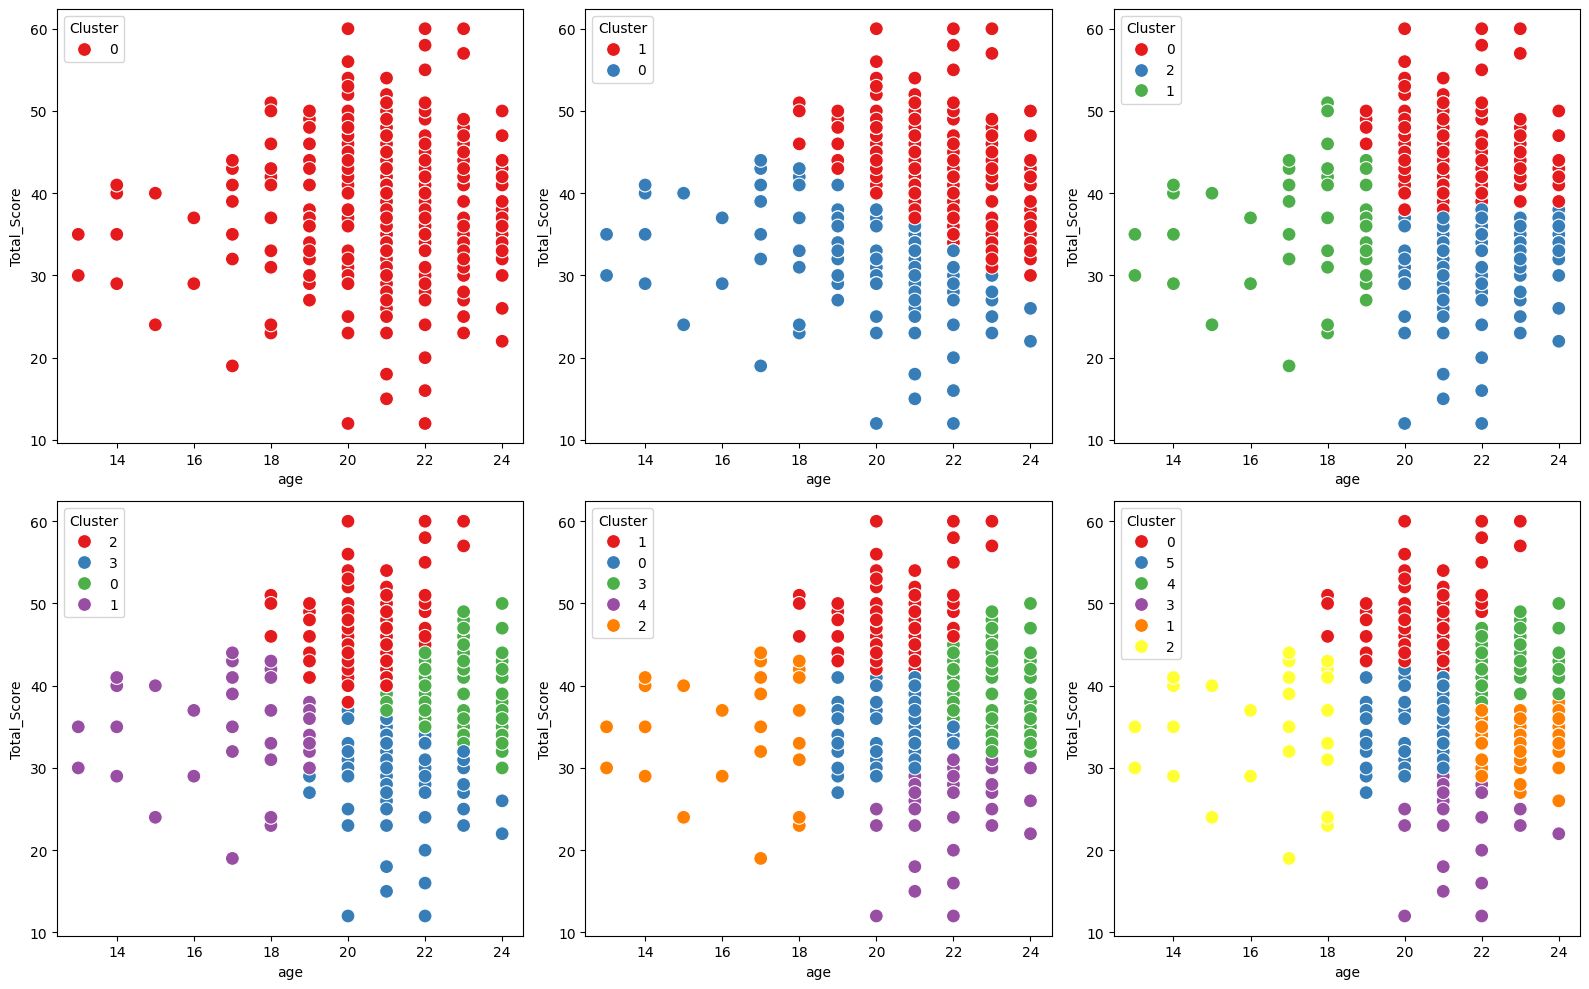

In [ ]:
# Definindo o número máximo de clusters
num_clusters = 6

# Calculando o número de linhas e colunas
cols = 3
rows = math.ceil(num_clusters / cols)

# Criando o grid
fig, axes = plt.subplots(rows, cols, figsize=(16, 10))


# Loop para cada quantidade de clusters
for k in range(1, num_clusters + 1):
    row = (k - 1) // cols
    col = (k - 1) % cols

    # Aplicando K-means para a quantidade atual de clusters (K)
    kmeans = KMeans(n_clusters=k, random_state=0)
    df['Cluster'] = kmeans.fit_predict(df[features])
    df['Cluster'] = df['Cluster'].astype(str)

    # Scatter plot dos dados coloridos
    ax = sns.scatterplot(ax=axes[row, col], data=df, s=100, x='age', y='Total_Score', hue='Cluster', palette='Set1')


# Ajustando layout e plotando
plt.tight_layout()
plt.show()

Após a construção dos gráficos de 2 a 6 clustes, consegue-se inferir que a quantidade 3 e 4 de clusters também apresentaria uma boa amostra dos grupos.

# Silhueta

In [ ]:
X=df[['age', 'Total_Score']]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

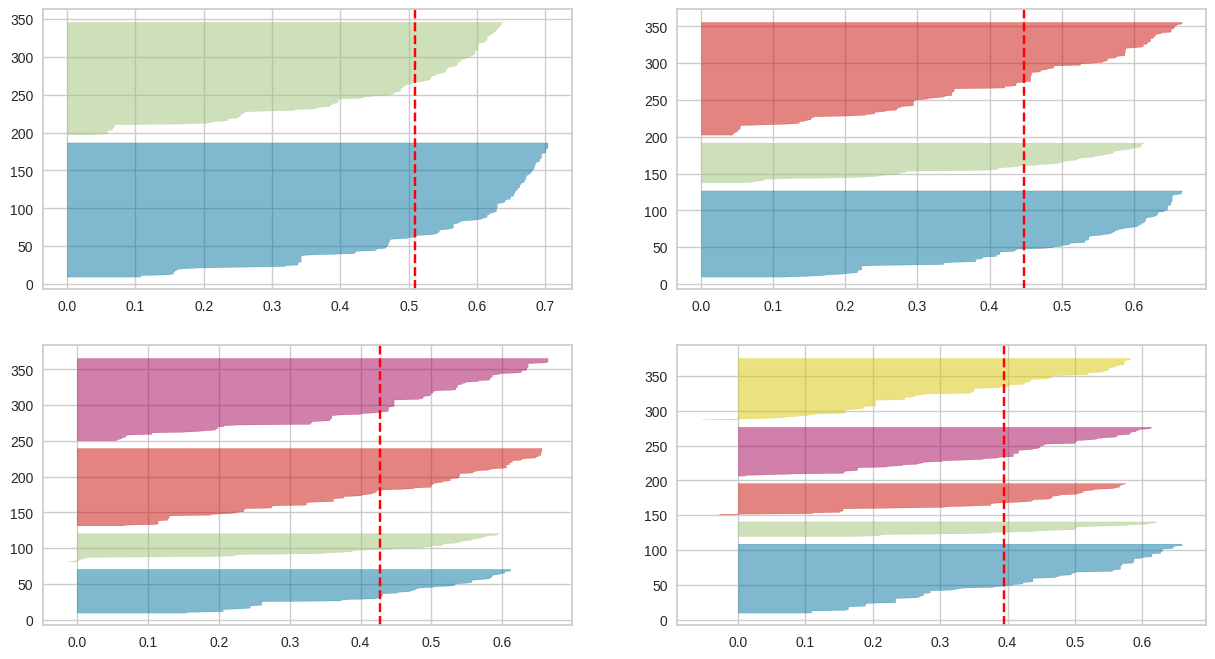

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
  q, mod = divmod(i, 2)
  km = KMeans(n_clusters=i, random_state=42)
  visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
  visualizer.fit(X)

O método Silhueta corrobora que as quantidade 3 e 4 de clusters apresentam uma boa amostra dos grupos.

# Índice Calinski-Harabasz e Davies-Bouldin

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score

In [ ]:
se = []
sil_scores = []
calinski_score = []
davies_score = []
index = range(2, 7)
for i in index:
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(X)
    se.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X, labels))
    calinski_score.append(calinski_harabasz_score(X, labels))
    davies_score.append(davies_bouldin_score(X, labels))

    print("---------------------------------------------------------------")
    print('Soma dos Erros Quadrados para K =', i, ':', kmeans.inertia_)
    print("Coeficiente de Silhueta: %0.3f" % silhouette_score(X, labels))
    print("Índice Calinski-Harabasz: %0.3f" % calinski_harabasz_score(X, labels))
    print("Índice Davies-Bouldin: %0.3f" % davies_bouldin_score(X, labels))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

---------------------------------------------------------------
Soma dos Erros Quadrados para K = 2 : 9859.128195460373
Coeficiente de Silhueta: 0.510
Índice Calinski-Harabasz: 482.296
Índice Davies-Bouldin: 0.680
---------------------------------------------------------------
Soma dos Erros Quadrados para K = 3 : 6075.151904028176
Coeficiente de Silhueta: 0.448
Índice Calinski-Harabasz: 491.049
Índice Davies-Bouldin: 0.697
---------------------------------------------------------------
Soma dos Erros Quadrados para K = 4 : 4175.488259891214
Coeficiente de Silhueta: 0.427
Índice Calinski-Harabasz: 523.817
Índice Davies-Bouldin: 0.718
---------------------------------------------------------------
Soma dos Erros Quadrados para K = 5 : 3272.365100234822
Coeficiente de Silhueta: 0.394
Índice Calinski-Harabasz: 521.952
Índice Davies-Bouldin: 0.763
---------------------------------------------------------------
Soma dos Erros Quadrados para K = 6 : 2662.386176099572
Coeficiente de Silhueta:

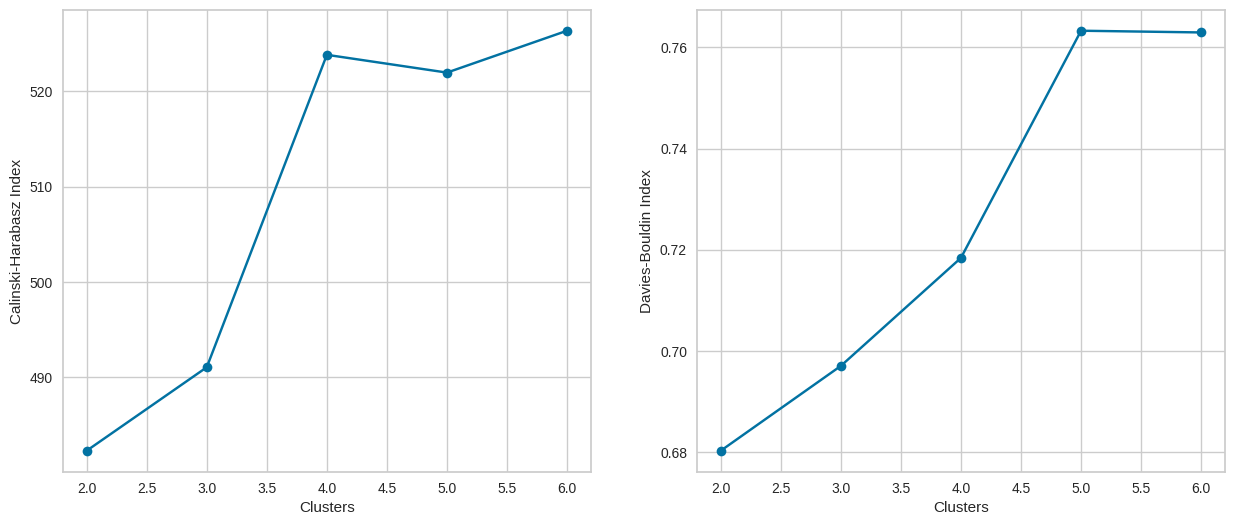

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

ax[0].plot(index, calinski_score, marker='o')
ax[0].set_xlabel('Clusters')
ax[0].set_ylabel('Calinski-Harabasz Index')

ax[1].plot(index, davies_score, marker='o')
ax[1].set_xlabel('Clusters')
ax[1].set_ylabel('Davies-Bouldin Index')

plt.show()

Lembrando que:

Soma dos Erros Quadrados (SSE): desejado o menor

Coeficiente de Silhueta: desejado o maior

Índice Calinski-Harabasz: desejado o maior

Índice Davies-Bouldin: desejado o menor

Na análise dos coeficientes de Silhueta, Índice Calinski-Harabasz e Índice Davies-Bouldin encontramos que os melhores índices apontam para o uso de 3 ou, atá 4 clusters, conforme apresentado abaixo.
__________________________________________________________________
Soma dos Erros Quadrados para K = 3 : 6075.151904028176

Coeficiente de Silhueta: 0.448

Índice Calinski-Harabasz: 491.049

Índice Davies-Bouldin: 0.697
___________________________________________________________________
Soma dos Erros Quadrados para K = 4 : 4175.488259891214

Coeficiente de Silhueta: 0.427

Índice Calinski-Harabasz: 523.817

Índice Davies-Bouldin: 0.718

Em conjunto com a análise visual do K-means, foi tomada a decisão de seguir com 3 clusters.

# Informações extras - Análise Exploratória

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 327 entries, 0 to 479
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Timestamp                  327 non-null    object 
 1   age                        327 non-null    int64  
 2   gender                     327 non-null    object 
 3   relationship_status        327 non-null    object 
 4   ocupation                  327 non-null    object 
 5   organization               310 non-null    object 
 6   social_media               327 non-null    object 
 7   platforms_used             327 non-null    object 
 8   average_time_spending      327 non-null    object 
 9   ADHD Q1                    327 non-null    int64  
 10  ADHD Q2                    327 non-null    int64  
 11  Anxiety Q1                 327 non-null    int64  
 12  ADHD Q3                    327 non-null    int64  
 13  Anxiety Q2                 327 non-null    int64  
 14 

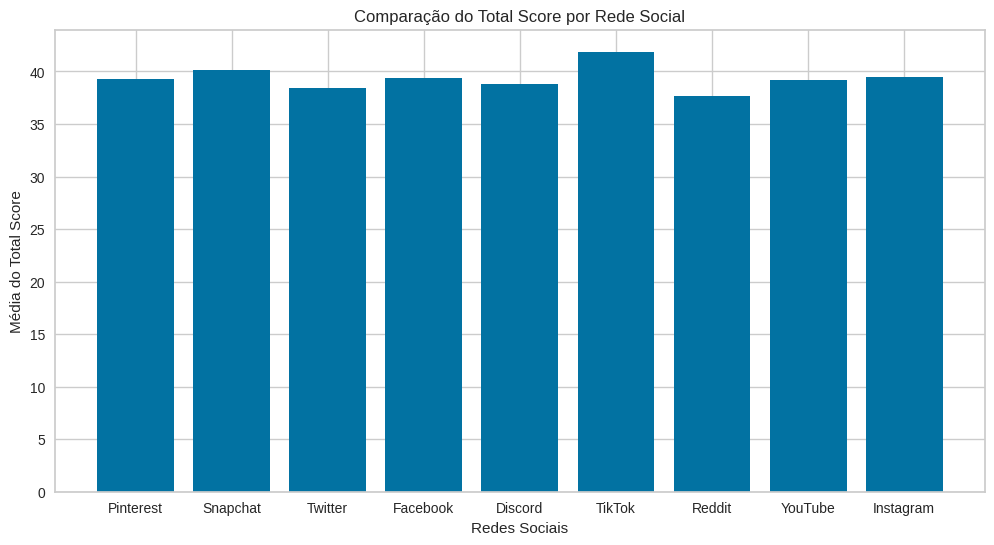

In [ ]:
import matplotlib.pyplot as plt

redes = ['Pinterest', 'Snapchat', 'Twitter', 'Facebook', 'Discord', 'TikTok', 'Reddit', 'YouTube', 'Instagram']
colunas = ['ADHD Score', 'Anxiety Score', 'Self Esteem Score', 'Depression Score', 'Total_Score']

scores = []
for rede in redes:
  media_score = df[df[rede] == 1]['Total_Score'].mean()
  scores.append(media_score)

plt.figure(figsize=(12,6))
plt.xlabel('Redes Sociais')
plt.ylabel('Média do Total Score')
plt.title('Comparação do Total Score por Rede Social')
plt.bar(redes, scores)
plt.show()


Não há diferença significativa do Total_Score para cada rede social individualmente.

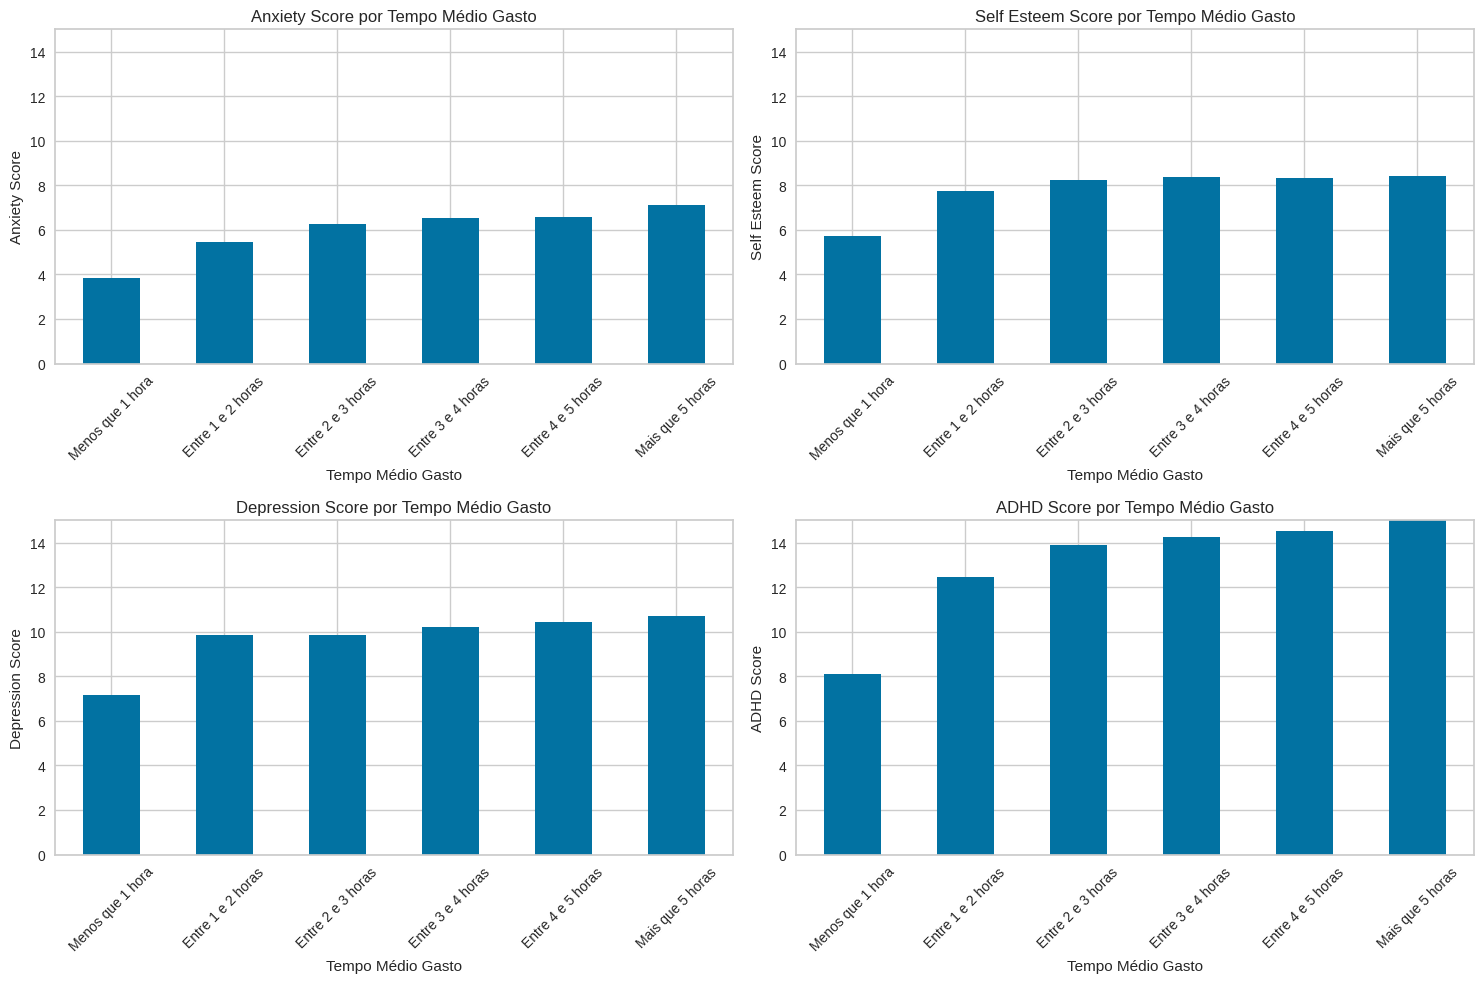

In [ ]:
# Mapeamento de números para texto
average_time_spending_map = {0: 'Menos que 1 hora', 1: 'Entre 1 e 2 horas',
                              2: 'Entre 2 e 3 horas', 3: 'Entre 3 e 4 horas',
                              4: 'Entre 4 e 5 horas', 5: 'Mais que 5 horas'}

# Função para substituir números por textos no eixo x
def replace_labels(ax):
    labels = [average_time_spending_map.get(int(label), label) for label in ax.get_xticks()]
    ax.set_xticklabels(labels, rotation=45)

# Lista de variáveis para plotar (exceto Total_Score)
y_vars = ['Anxiety Score', 'Self Esteem Score', 'Depression Score', 'ADHD Score']

# Criação de subplots para variáveis que não são Total_Score
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()

# Gerar gráficos
for i, y_var in enumerate(y_vars):
    ax = axes[i]
    df.groupby('average_time_spending_map')[y_var].mean().plot(kind='bar', ax=ax)
    ax.set_title(f'{y_var} por Tempo Médio Gasto')
    ax.set_xlabel('Tempo Médio Gasto')
    ax.set_ylabel(y_var)
    replace_labels(ax)
    ax.set_ylim(0, 15)

# Ajustar layout
plt.tight_layout()
plt.show()

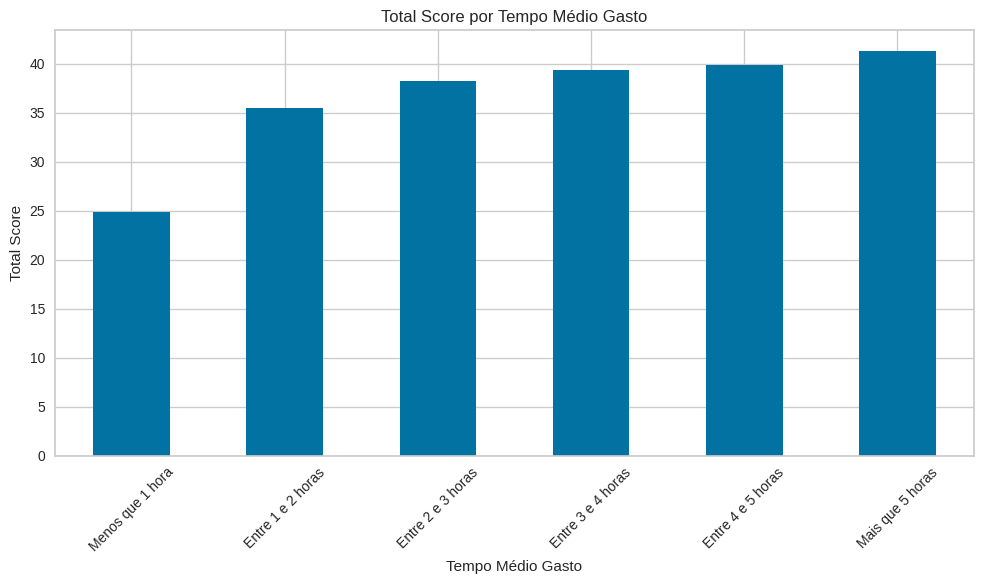

In [ ]:
# Gráfico separado para Total_Score
plt.figure(figsize=(10, 6))
df.groupby('average_time_spending_map')['Total_Score'].mean().plot(kind='bar')
plt.title('Total Score por Tempo Médio Gasto')
plt.xlabel('Tempo Médio Gasto')
plt.ylabel('Total Score')
replace_labels(plt.gca())
plt.tight_layout()
plt.show()
